<a href="https://colab.research.google.com/github/mickaelrebeau/Colab-Repo/blob/main/Prediction_cars_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

score, cross validation, gridsearch ou randomize search.

# Importation des modules

In [ ]:
# Pour lire un csv depuis drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Modules de base
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame
import math
import re as re
%matplotlib inline

In [ ]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Importation du dataset

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

In [ ]:
# 'https://drive.google.com/file/d/1CoTEepAbFPR1c1V4xkaYKZB4l85teqQk/view?usp=sharing'
fileDownload = drive.CreateFile({'id':'1CoTEepAbFPR1c1V4xkaYKZB4l85teqQk'})

In [ ]:
fileDownload.GetContentFile('fullspecs.csv')

In [ ]:
url = 'https://drive.google.com/file/d/1CoTEepAbFPR1c1V4xkaYKZB4l85teqQk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df= pd.read_csv(path, low_memory=False, index_col=0, header=None).T

In [ ]:
df = pd.read_csv('fullspecs.csv', header=0, index_col=0).T

FileNotFoundError: ignored

# Exploration du dataframe

In [ ]:
url = 'https://drive.google.com/file/d/1CoTEepAbFPR1c1V4xkaYKZB4l85teqQk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, low_memory=False, index_col=0, header=None).T

In [ ]:
# Vérification du nombre de lignes et de colonnes
df.shape

(32316, 235)

In [ ]:
# Nombre de valeurs nulles 
df.isnull().sum()

0
NaN                                    0
MSRP                                  54
Gas Mileage                         6024
Engine                              1975
EPA Class                           1976
                                   ...  
Fifth Head Room (in)               32316
Fifth Hip Room (in)                32316
Fifth Leg Room (in)                32316
Corrosion Note                     32209
Hybrid/Electric Components Note    32247
Length: 235, dtype: int64

In [ ]:
# Aspect du dataframe
df.head()

,NaN,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume (ft³),Second Head Room (in),Front Shoulder Room (in),Second Hip Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),Min Ground Clearance (in),"Track Width, Front (in)","Width, Max w/o mirrors (in)","Track Width, Rear (in)","Height, Overall (in)",Cargo Volume to Seat 1 (ft³),Cargo Volume to Seat 2 (ft³),Cargo Volume to Seat 3 (ft³),"Fuel Tank Capacity, Approx (gal)",Fuel Economy Est-Combined (MPG),EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Engine Order Code,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,...,"Steering Ratio (:1), On Center","Steering Ratio (:1), At Lock",Spare Tire Capacity (lbs),Front Tire Capacity (lbs),Revolutions/Mile @ 45 mph - Spare,Revolutions/Mile @ 45 mph - Front,Rear Tire Capacity (lbs),Revolutions/Mile @ 45 mph - Rear,Axle Capacity - Front (lbs),Spring Capacity - Front (lbs),Axle Capacity - Rear (lbs),Spring Capacity - Rear (lbs),Maximum Alternator Watts,Fifth Wheel Hitch - Max Trailer Wt. (lbs),Fifth Wheel Hitch - Max Tongue Wt. (lbs),"Length, Overall w/o rear bumper (in)",Front Bumper to Back of Cab (in),"Frame Width, Rear (in)",Cab to Axle (in),"Overhang, Rear w/o bumper (in)",Ground to Top of Frame (in),Cab to End of Frame (in),"Cargo Box Width @ Top, Rear (in)",Cargo Volume (ft³),Cargo Box Width @ Floor (in),Ext'd Cab Cargo Volume (ft³),Cargo Box Length @ Floor (in),Tailgate Width (in),Drivetrain Note,Emissions Note,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
1,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,Small Sport Utility Vehicles 2WD,3790,55,41.6,56.6,104,38.3,59.7,49.9,39.6,38.4,108.3,5.7,64.2,74.8,64.7,65.7,58.9,29.5,29.5,17.1,24,22,28,NaN,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,Small Sport Utility Vehicles 2WD,3829,55,41.6,56.6,104,38.3,59.7,49.9,39.6,38.4,108.3,5.7,64.2,74.8,64.7,65.7,58.9,29.5,29.5,17.1,24,22,28,NaN,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,Small Sport Utility Vehicles 2WD,3821,55,41.6,56.6,104,38.3,59.7,49.9,39.6,38.4,108.3,5.7,64.2,74.8,64.7,65.7,58.9,29.5,29.5,17.1,24,22,27,NaN,280 @ 1600,Gasoline Direct Injection,Turbo Premium Unleaded I-4,272 @ 6500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019 Acura RDX Specs: FWD,"$37,400",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc

In [ ]:
# Valeurs de colonnes spécifiques
df.iloc[:,100:110].isnull().sum()

0
Basic Miles/km                         2117
Basic Years                            2117
Corrosion Miles/km                     3004
Corrosion Years                        2966
Drivetrain Miles/km                    2788
Drivetrain Years                       2788
Roadside Assistance Miles/km           7023
Roadside Assistance Years              7020
Maximum Alternator Capacity (amps)     4915
Cold Cranking Amps @ 0° F (Primary)    6086
dtype: int64

# Dataframe utilisé

**Récupération de 10 colonnes pour le Machine Learning**

In [ ]:
# Sélection de 10 colonnes sans trop de valeurs nulles
# df = df.iloc[:,[0,2,4,5,6,9,30,39,66,102]]
df = df[["MSRP", "Engine", "Style Name", "Drivetrain", "Passenger Capacity", "Transmission", "Fuel Tank Capacity, Approx (gal)", "Displacement", "Front Tire Size", "Corrosion Years"]]

In [ ]:
# Valeurs nulles de la nouvelle dataframe
df.isnull().sum()

0
MSRP                                  54
Engine                              1975
Style Name                             0
Drivetrain                          1716
Passenger Capacity                     0
Transmission                        2714
Fuel Tank Capacity, Approx (gal)    2137
Displacement                        2142
Front Tire Size                     1973
Corrosion Years                     2966
dtype: int64



> MSRP = Le prix du véhicule

> Engine = Moteur du véhicule

> Style name = Nombre de roue motrice

> Drivetrain = Transmission

> Passenger Capacity = Nombre de sièges

> Transmission = Boîte de vitesse

> Fuel tank capacity = Réservoir d'essence en gallon

> Displacement = Litres aux 100

> Front tire size = Tailles des roue avant

> Corrosion years = Année avant corrosion




# Nétoyage des données

**Les valeurs nulles du prix des véhicules**

In [ ]:
df

,MSRP,Engine,Style Name,Drivetrain,Passenger Capacity,Transmission,"Fuel Tank Capacity, Approx (gal)",Displacement,Front Tire Size,Corrosion Years
1,"$40,600","Turbo Premium Unleaded I-4, 2.0 L",FWD w/Technology Pkg,Front Wheel Drive,5,Transmission: 10-Speed Automatic -inc: sequent...,17.1,2.0 L/122,P235/55HR19,5
2,"$45,500","Turbo Premium Unleaded I-4, 2.0 L",FWD w/Advance Pkg,Front Wheel Drive,5,Transmission: 10-Speed Automatic -inc: sequent...,17.1,2.0 L/122,P235/55HR19,5
3,"$43,600","Turbo Premium Unleaded I-4, 2.0 L",FWD w/A-Spec Pkg,Front Wheel Drive,5,Transmission: 10-Speed Automatic -inc: sequent...,17.1,2.0 L/122,P255/45VR20,5
4,"$37,400","Turbo Premium Unleaded I-4, 2.0 L",FWD,Front Wheel Drive,5,Transmission: 10-Speed Automatic -inc: sequent...,17.1,2.0 L/122,P235/55HR19,5
5,"$42,600","Turbo Premium Unleaded I-4, 2.0 L",AWD w/Technology Pkg,All Wheel Drive,5,Transmission: 10-Speed Automatic -inc: sequent...,17.1,2.0 L/122,P235/55HR19,5
...,...,...,...,...,...,...,...,...,...,...
32312,"$45,700","Intercooled Turbo Regular Unleaded I-4, 2.0 L",T5 AWD Platinum,All Wheel Drive,5,Transmission: 8-Speed Geartronic Automatic -in...,17.8,2.0 L/120,P235/50VR18,12
32313,"$41,200","Intercooled Turbo Regular Unleaded I-5, 2.5 L",4dr Wgn T5 AWD,All Wheel Drive,5,Transmission: 6-Speed Geartronic Automatic -in...,17.8,2.5 L/154,P235/50VR18,12
32314,"$44,850","Intercooled Turbo Regular Unleaded I-5, 2.5 L",4dr Wgn T5 Platinum AWD,All Wheel Drive,5,Transmission: 6-Speed Geartronic Automatic -in...,17.8,2.5 L/154,P235/50VR18,12
32315,"$41,000","Intercooled Turbo Regular Unleaded I-5, 2.5 L",2015.5 4dr Wgn T5 AWD,All Wheel Drive,5,Transmission: 6-Speed Geartronic Automatic -in...,17.8,2.5 L/154,P235/50VR18,12


In [ ]:
df['MSRP'].describe()

count       32262
unique      10228
top       $29,995
freq           64
Name: MSRP, dtype: object

In [ ]:
# Transformation du prix en valeur float
df['Prix'] = df['MSRP'].str.replace('$','')
df['Prix'] = df['Prix'].str.replace(',','')
df['Prix'] = df['Prix'].astype(float)

In [ ]:
df['Prix'].describe()

count     32262.000000
mean      37707.459426
std       32392.375762
min        6929.000000
25%       23140.000000
50%       30557.500000
75%       40758.750000
max      548800.000000
Name: Prix, dtype: float64

In [ ]:
# Remplacement des valeurs nulle par la moyenne
df["Prix"].fillna(df.groupby("Passenger Capacity")["Prix"].transform("median"), inplace=True)

In [ ]:
df["Prix"]

1        40600.0
2        45500.0
3        43600.0
4        37400.0
5        42600.0
          ...   
32312    45700.0
32313    41200.0
32314    44850.0
32315    41000.0
32316    44650.0
Name: Prix, Length: 32316, dtype: float64

In [ ]:
df.drop(columns='MSRP',inplace=True)

**Suppression de lignes**

In [ ]:
df.dropna(subset=['Corrosion Years'], inplace=True)

In [ ]:
df.dropna(subset=['Transmission'], inplace=True)

**Les valeurs nulles de la motorisation**

In [ ]:
df['Engine'].describe()

count            27308
unique             431
top       Gas V8, 6.0L
freq              1025
Name: Engine, dtype: object

In [ ]:
df['Engine'].fillna(value='Gas V8, 6.0L',inplace=True)

In [ ]:
df['Engine'].isnull().sum()

0

**Les valeurs nulles de la tailles de roue avant**

In [ ]:
df['Front Tire Size'].describe()

count          27310
unique           832
top       P265/70R17
freq             701
Name: Front Tire Size, dtype: object

In [ ]:
df['Front Tire Size'].fillna(value='P265/70R17',inplace=True)

In [ ]:
df['Front Tire Size'].isnull().sum()

0

**Les valeurs nulles du réservoir d'essence**

In [ ]:
df['Fuel Tank Capacity, Approx (gal)'].describe()

count     27231
unique      232
top          26
freq       2183
Name: Fuel Tank Capacity, Approx (gal), dtype: object

In [ ]:
df['Fuel Tank Capacity, Approx (gal)'].fillna(value='26.0',inplace=True)

In [ ]:
df['Fuel Tank Capacity, Approx (gal)'].isnull().sum()

0

**Les valeurs nulles du litre aux 100**

In [ ]:
df['Displacement'].describe()

count         27226
unique          399
top       2.0 L/122
freq            928
Name: Displacement, dtype: object

In [ ]:
df['Displacement'].fillna(value='2.0 L/122',inplace=True)

In [ ]:
df['Displacement'].isnull().sum()

0

**Plus aucunnes valeurs nulles**

In [ ]:
df.isnull().sum()

0
Engine                              0
Style Name                          0
Drivetrain                          0
Passenger Capacity                  0
Transmission                        0
Fuel Tank Capacity, Approx (gal)    0
Displacement                        0
Front Tire Size                     0
Corrosion Years                     0
Prix                                0
dtype: int64

In [ ]:
df.shape

(27314, 10)

# Préparation Machine Learning

In [ ]:
#changement de type
df['Passenger Capacity'] = df['Passenger Capacity'].astype(int)

In [ ]:
#changement de type
df['Corrosion Years'] = df['Corrosion Years'].astype(int)

In [ ]:
#remplacement des lettres
df['Fuel Tank Capacity, Approx (gal)'] = df['Fuel Tank Capacity, Approx (gal)'].replace('- TBD -','26.0')

In [ ]:
#retir les lettres
df['Fuel Tank Capacity, Approx (gal)'] = df['Fuel Tank Capacity, Approx (gal)'].replace('8.03 GGE','8.03')

In [ ]:
#chagnement de type
df['Fuel Tank Capacity, Approx (gal)'] = df['Fuel Tank Capacity, Approx (gal)'].astype(float)

In [ ]:
#transformation des valeurs de Passenger Capacity pour le ML
df["Passenger Capacity"] = df["Passenger Capacity"].replace([1,2,3,4],1)
df["Passenger Capacity"] = df["Passenger Capacity"].replace(5,2)
df["Passenger Capacity"] = df["Passenger Capacity"].replace([6,7],3)
df["Passenger Capacity"] = df["Passenger Capacity"].replace([8,9,12,15],4)

In [ ]:
#transformation des valeurs de Corrosion Years pour le ML
df["Corrosion Years"] = df["Corrosion Years"].replace([2,3,4],1)
df["Corrosion Years"] = df["Corrosion Years"].replace(5,2)
df["Corrosion Years"] = df["Corrosion Years"].replace([6,7],3)
df["Corrosion Years"] = df["Corrosion Years"].replace([8,10,12],4)

In [ ]:
#transformation des valeurs de Drivetrain pour le ML
df['Drivetrain'] = df['Drivetrain'].replace('Rear Wheel Drive',1)
df['Drivetrain'] = df['Drivetrain'].replace('Front Wheel Drive',2)
df['Drivetrain'] = df['Drivetrain'].replace('All Wheel Drive',3)
df['Drivetrain'] = df['Drivetrain'].replace('4-Wheel Drive',4)
df['Drivetrain'] = df['Drivetrain'].replace('Four Wheel Drive',5)
df['Drivetrain'] = df['Drivetrain'].replace(['All-Wheel Drive','4 Wheel Drive','Front-Wheel Drive','Four-Wheel Drive','Rear wheel drive','AWD','Rear-Wheel Drive','Front wheel drive','4WD','All wheel drive','2 Wheel Drive','REAR WHEEL DRIVE','Four wheel drive','All-wheel drive','2WD','2-Wheel Drive','Front-wheel drive','RWD','4-wheel Drive'],6)      

In [ ]:
#Changement des valeurs pour Fuel Tank Capacity grace à qcut
df['Fuel Tank Capacity, Approx (gal)'] = pd.qcut(df['Fuel Tank Capacity, Approx (gal)'], labels=[0,1,2,3,4], q=5)

In [ ]:
df['Fuel Tank Capacity, Approx (gal)'] = df['Fuel Tank Capacity, Approx (gal)'].astype(int)

In [ ]:
#pour afficher plus de lignes, ici 500
pd.set_option('display.max_rows', 500)

In [ ]:
df.nunique()

0
Engine                               431
Style Name                          9633
Drivetrain                             6
Passenger Capacity                     4
Transmission                        1822
Fuel Tank Capacity, Approx (gal)       5
Displacement                         399
Front Tire Size                      832
Corrosion Years                        4
Prix                                8968
dtype: int64

In [ ]:
df['Prix'] = df['Prix'].astype(int)

In [ ]:
df.head(1)

,Engine,Style Name,Drivetrain,Passenger Capacity,Transmission,"Fuel Tank Capacity, Approx (gal)",Displacement,Front Tire Size,Corrosion Years,Prix
1,"Turbo Premium Unleaded I-4, 2.0 L",FWD w/Technology Pkg,2,2,Transmission: 10-Speed Automatic -inc: sequent...,1,2.0 L/122,P235/55HR19,2,40600


# Machine Learning

In [ ]:
X = df.drop(columns=['Prix','Engine','Style Name','Transmission','Displacement','Front Tire Size'],axis=1)
y = df['Prix']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train.head(1)

,Drivetrain,Passenger Capacity,"Fuel Tank Capacity, Approx (gal)",Corrosion Years
24901,5,3,3,2


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16388 entries, 24901 to 28126
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Drivetrain                        16388 non-null  int64
 1   Passenger Capacity                16388 non-null  int64
 2   Fuel Tank Capacity, Approx (gal)  16388 non-null  int64
 3   Corrosion Years                   16388 non-null  int64
dtypes: int64(4)
memory usage: 640.2 KB


In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
def KNN_model(k, p):
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    scoring = 'accuracy'
    score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
    return score

In [ ]:
def plot_KNN_model():
    p = [1,2]
    for val in p:
        ix= []
        KNN_Score = []
        for k in np.arange(3, 32, 5):
            print(f' pour k = {k} et p = {val}, KNN Score = {round(np.mean(KNN_model(k, val))*100, 2)}')
            ix.append(k)
            KNN_Score.append(round(np.mean(KNN_model(k, val))*100, 2))
        if val ==1:
            plt.plot(ix, KNN_Score, color='red', label='Manhattan distance')
        else:
            plt.plot(ix, KNN_Score, color='blue', label=' Euclidean distance')
        print('************************************************')
        plt.legend(loc='best')
        plt.xlabel('K')
        plt.ylabel('KNN SCORE')

 pour k = 3 et p = 1, KNN Score = 0.41
 pour k = 8 et p = 1, KNN Score = 0.4
 pour k = 13 et p = 1, KNN Score = 0.41
 pour k = 18 et p = 1, KNN Score = 0.41
 pour k = 23 et p = 1, KNN Score = 0.49
 pour k = 28 et p = 1, KNN Score = 0.5
************************************************
 pour k = 3 et p = 2, KNN Score = 0.41
 pour k = 8 et p = 2, KNN Score = 0.4
 pour k = 13 et p = 2, KNN Score = 0.41
 pour k = 18 et p = 2, KNN Score = 0.41
 pour k = 23 et p = 2, KNN Score = 0.49
 pour k = 28 et p = 2, KNN Score = 0.5
************************************************


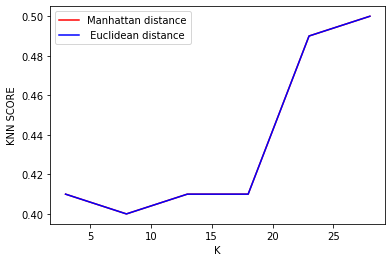

In [ ]:
plot_KNN_model()

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 18, metric='minkowski', p = 1)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.0042709  0.00244051 0.00366077 0.00793167 0.0042709  0.00366077
 0.00366077 0.00305064 0.003663   0.004884  ]


In [ ]:
round(np.mean(score)*100, 2)

0.41

In [ ]:
#DecisionTree

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.00854179 0.00732154 0.00732154 0.00732154 0.00488103 0.00793167
 0.00732154 0.00793167 0.004884   0.00915751]


0.73

In [ ]:
#RandomForest

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.00854179 0.00793167 0.00915192 0.00854179 0.00732154 0.00976205
 0.00610128 0.00488103 0.00549451 0.00976801]


In [ ]:
round(np.mean(score)*100, 2)

0.77

In [ ]:
# #SVC

# clf = SVC()
# scoring = 'accuracy'
# score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
# print(score)
# round(np.mean(score)*100,2)

**GridSearch**

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}

Les paramètres du GridSearch ne sont pas idéaux, je n'ai pas eu le temps de trouver des paramètres optimaux.

In [ ]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3,n_jobs=1)

grid.fit(X_train, y_train)

print(grid.best_params_) 
grid_predictions = grid.predict(X_test)

print(r2_score(y_test, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.1, gamma=scale, kernel=linear, score=-0.060, total=   8.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV] .. C=0.1, gamma=scale, kernel=linear, score=-0.044, total=   8.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s


[CV] .. C=0.1, gamma=scale, kernel=linear, score=-0.044, total=   8.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] .. C=0.1, gamma=scale, kernel=linear, score=-0.046, total=   8.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] .. C=0.1, gamma=scale, kernel=linear, score=-0.037, total=   8.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ... C=0.1, gamma=auto, kernel=linear, score=-0.060, total=   8.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ... C=0.1, gamma=auto, kernel=linear, score=-0.044, total=   8.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ... C=0.1, gamma=auto, kernel=linear, score=-0.044, total=   8.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ... C=0.1, gamma=auto, kernel=linear, score=-0.046, total=   8.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.3min finished


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
-0.0179459468201022
